In [1]:
# import libraries

import pandas as pd
import numpy as np
import statistics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

**Data Cleaning**

In [2]:
df = pd.read_csv('Mushroom_Class/Data/agaricus-lepiota.csv')
df.shape

(8124, 23)

In [3]:
df.head()

,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
df.Y.value_counts()

e    4208
p    3916
Name: Y, dtype: int64

In [5]:
df.columns

Index(['Y', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

***Replacing The Letter Attributes in Each Feature With Their Unnabreviated Terms To Help Clarify The Dataset.***

In [6]:
df['Y'] = df['Y'].replace(['p','e'],['1','0'])
df['cap-shape'] = df['cap-shape'].replace(['b','c','x','f','k','s'],['bell','conical','convex','flat','knobbed','sunken'])

df['cap-surface'] = df['cap-surface'].replace(['f','g','y','s'],['fibrous','grooves','scaly','smooth'])

df['cap-color'] = df['cap-color'].replace(['n','b','c','g','r','p','u','e','w','y'],['brown','buff','cinnamon','gray','green','pink','purple','red','white','yellow'])

df['bruises'] = df['bruises'].replace(['t','f'],['True','False'])

df['odor']= df['odor'].replace(['a','l','c','y','f','m','n','p','s'],['almond','anise','creosote','fishy','foul','musty','none','pungent','spicy'])

df['gill-attachment'] = df['gill-attachment'].replace(['a','d','f','n'],['attached','descending','free','notched'])

df['gill-spacing'] = df['gill-spacing'].replace(['c','w','d'],['close','crowded','distant'])

df['gill-size'] = df['gill-size'].replace(['b','n'],['broad','narrow'])

df['gill-color'] = df['gill-color'].replace(['k','n','b','h','g','r','o','p','u','e','w','y'],['black','brown','buff','chocolate','gray','green','orange','pink','purple','red','white','yellow'])

df['stalk-shape'] = df['stalk-shape'].replace(['e','t'],['enlarging','tapering'])

df['stalk-root'] = df['stalk-root'].replace(['b','c','u','e','z','r','?'],['bulbous','club','cup','equal','rhizomorphs','rooted',np.nan])

df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].replace(['f','y','k','s'],['fibrous','scaly','silky','smooth'])

df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].replace(['f','y','k','s'],['fibrous','scaly','silky','smooth'])

df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace(['n','b','c','g','o','p','e','w','y'],['brown','buff','cinnamon','gray','orange','pink','red','white','yellow'])

df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace(['n','b','c','g','o','p','e','w','y'],['brown','buff','cinnamon','gray','orange','pink','red','white','yellow'])

df['veil-type'] = df['veil-type'].replace(['p','u'],['partial','universal'])

df['veil-color'] = df['veil-color'].replace(['n','o','w','y'],['brown','orange','white','yellow'])

df['ring-number'] = df['ring-number'].replace(['n','o','t'],['none','one','two'])

df['ring-type'] = df['ring-type'].replace(['c','e','f','l','n','p','s','z'],['cobwebby','evanescent','flaring','large','none','pendant','sheathings','zone'])

df['spore-print-color'] = df['spore-print-color'].replace(['k','n','b','h','r','o','u','w','y'],['black','brown','buff','chocolate','green','orange','purple','white','yellow'])

df['population'] = df['population'].replace(['a','c','n','s','v','y'],['abundant','clustered','numerous','scattered','several','solitary'])

df['habitat'] = df['habitat'].replace(['g','l','m','p','u','w','d'],['grasses','leaves','meadows','paths','urban','waste','woods'])

**Checking Dataframe for Null-Values**

In [7]:
df.shape

(8124, 23)

In [8]:
df.isnull().sum()

Y                              0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [9]:
#Stalk-Root Is The Only Feature Containing Missing Values. It Contains 2480 Missing Entries Which Equates To Roughly 30% Of The Data.

**Creating A New Column Called 'Stalk-Root-Missing' With Values That Are Equal To Either 0 Or 1. This Is Being Done To Indiciate Which Rows In The Stalk-Root Feature Contain Missing Data. ( 0 = Contains Data, 1 = Missing Data )**

In [10]:
df['stalk-root-missing'] = df['stalk-root'].replace(['bulbous','club','cup','equal','rhizomorphs','rooted',np.nan],[0, 0, 0, 0, 0, 0, 1])

**Imputing The Mode (Respectively) For All Missing Values In The Stalk-Root Feature**

In [11]:
df['stalk-root'].mode()

0    bulbous
dtype: object

In [12]:
#Checking Stalk-Root Value Counts Before Null-Values are Replaced With The Mode.
df['stalk-root'].value_counts()

bulbous    3776
equal      1120
club        556
rooted      192
Name: stalk-root, dtype: int64

In [13]:
df['stalk-root'] = df['stalk-root'].transform( lambda x: x.fillna(x.mode()[0]))

In [14]:
#Re-Checking Stalk-Root Value Counts After Replacing Null Values With The Mode.
df['stalk-root'].value_counts()

bulbous    6256
equal      1120
club        556
rooted      192
Name: stalk-root, dtype: int64

**Re-Checking Dataframe for Null-Values**

In [15]:
df.isnull().sum()

Y                           0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
stalk-root-missing          0
dtype: int64

***EDA***

In [16]:
df.head()
X = df.drop('Y', axis=1)
y = df['Y']

In [17]:
df.describe()

,stalk-root-missing
count,8124.000000
mean,0.305268
std,0.460549
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [18]:
df.dtypes

Y                           object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
stalk-root-missing           int64
dtype: object

***Cap Shape***

In [19]:
df.groupby('Y')['cap-shape'].value_counts()

Y  cap-shape
0  convex       1948
   flat         1596
   bell          404
   knobbed       228
   sunken         32
1  convex       1708
   flat         1556
   knobbed       600
   bell           48
   conical         4
Name: cap-shape, dtype: int64

In [20]:
X['cap-shape'].value_counts()

convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap-shape, dtype: int64

In [21]:
p_cap_shape_percentages= {   
                        'Convex': ((1708/3656)*100),
                        'Flat': ((1556/3152)*100),
                        'Knobbed': ((600/828)*100),
                        'Bell': ((48/452)*100),
                        'Sunken': ((0/32)*100),
                        'Conical': ((4/4)*100)
                    }
df_p_cap_shape_percentages = pd.DataFrame(p_cap_shape_percentages, index=[1])

In [22]:
df_p_cap_shape_percentages

,Convex,Flat,Knobbed,Bell,Sunken,Conical
1,46.717724,49.365482,72.463768,10.619469,0.0,100.0


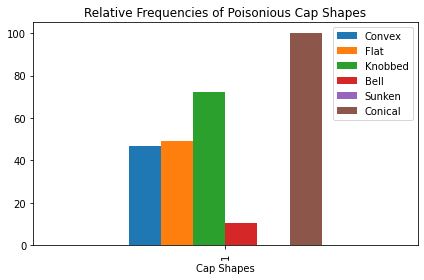

In [23]:
ax = df_p_cap_shape_percentages.plot.bar()
ax.set_title('Relative Frequencies of Poisonious Cap Shapes')
ax.set_xlabel('Cap Shapes')

plt.tight_layout()
plt.show()

In [24]:
#Conical Mushrooms Are All Poisonous (Only 4 Conical Mushrooms in DataSet So May Not Be A Good Indicator)
#Sunken Mushrooms Are All Non-Poisonous (Only 32 Sunken Mushrooms in DataSet So May Not Be A Good Indicator)
#Approximately 72% of Knobbed Cap-Shaped Mushrooms are Poisonous (May Be a Good Indicator)

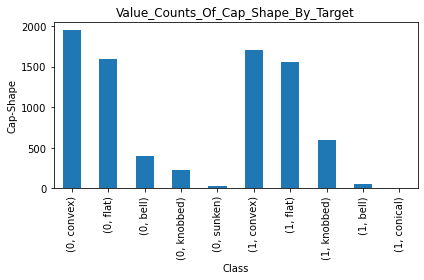

In [25]:
ax= df.groupby('Y')['cap-shape'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Cap_Shape_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Cap-Shape')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Cap_Shape_By_Target.png')
plt.show()

***Cap Surface***

In [26]:
df.groupby('Y')['cap-surface'].value_counts()

Y  cap-surface
0  fibrous        1560
   scaly          1504
   smooth         1144
1  scaly          1740
   smooth         1412
   fibrous         760
   grooves           4
Name: cap-surface, dtype: int64

In [27]:
X['cap-surface'].value_counts()

scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap-surface, dtype: int64

In [28]:
p_cap_surface_percentages= {   
                        'Scaly': ((1740/3244)*100),
                        'Smooth': ((1412/2556)*100),
                        'Fibrous': ((760/2320)*100),
                        'Grooves': ((4/4)*100),
                    }
df_p_cap_surface_percentages = pd.DataFrame(p_cap_surface_percentages, index=[1])
df_p_cap_surface_percentages 

,Scaly,Smooth,Fibrous,Grooves
1,53.637485,55.242567,32.758621,100.0


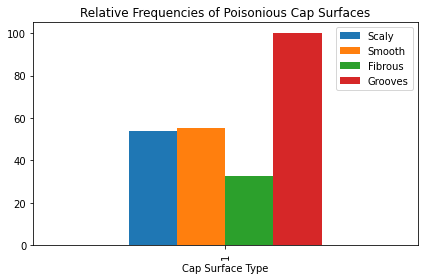

In [29]:
ax = df_p_cap_surface_percentages.plot.bar()
ax.set_title('Relative Frequencies of Poisonious Cap Surfaces')
ax.set_xlabel('Cap Surface Type')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Cap_Surfaces.png')
plt.show()

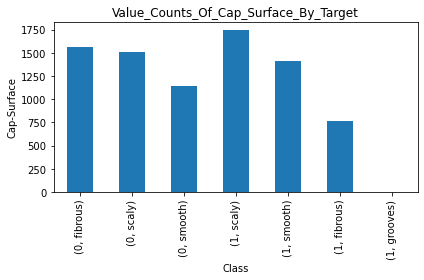

In [30]:
ax= df.groupby('Y')['cap-surface'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Cap_Surface_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Cap-Surface')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Cap_Surface_By_Target.png')
plt.show()

***Cap Color***

In [31]:
df.groupby('Y')['cap-color'].value_counts()

Y  cap-color
0  brown        1264
   gray         1032
   white         720
   red           624
   yellow        400
   pink           56
   buff           48
   cinnamon       32
   green          16
   purple         16
1  brown        1020
   red           876
   gray          808
   yellow        672
   white         320
   buff          120
   pink           88
   cinnamon       12
Name: cap-color, dtype: int64

In [32]:
X['cap-color'].value_counts()

brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
green         16
purple        16
Name: cap-color, dtype: int64

In [33]:
p_cap_color_percentages= {   
                        'Brown': ((1020/2284)*100),
                        'Gray': ((808/1840)*100),
                        'Red': ((876/1500)*100),
                        'Yellow': ((672/1072)*100),
                        'White': ((320/1040)*100),
                        'Buff': ((120/168)*100),
                        'Pink': ((88/144)*100),
                        'Cinnamon': ((12/44)*100),
                        'Purple': ((0/16)*100),
                        'Green': ((0/16)*100),
                    }
df_p_cap_color_percentages = pd.DataFrame(p_cap_color_percentages, index=[1])
df_p_cap_color_percentages

,Brown,Gray,Red,Yellow,White,Buff,Pink,Cinnamon,Purple,Green
1,44.658494,43.913043,58.4,62.686567,30.769231,71.428571,61.111111,27.272727,0.0,0.0


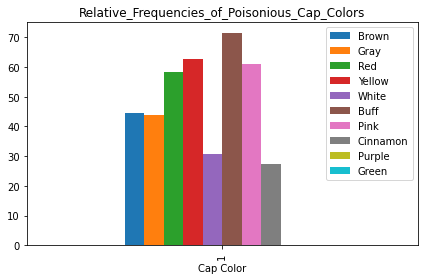

In [34]:
ax = df_p_cap_color_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Cap_Colors')
ax.set_xlabel('Cap Color')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Cap_Colors.png')
plt.show()

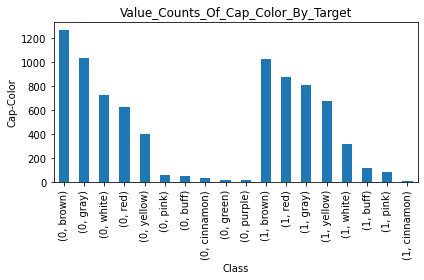

In [35]:
ax= df.groupby('Y')['cap-color'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Cap_Color_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Cap-Color')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Cap_Color_By_Target.png')
plt.show()

***Bruises***

In [36]:
df.groupby('Y')['bruises'].value_counts()

Y  bruises
0  True       2752
   False      1456
1  False      3292
   True        624
Name: bruises, dtype: int64

In [37]:
X['bruises'].value_counts()

False    4748
True     3376
Name: bruises, dtype: int64

In [38]:
p_bruises_percentages= {   
                        'No Bruises': ((3292/4748)*100),
                        'Bruises': ((624/3376)*100)
                        }
df_p_bruises_percentages = pd.DataFrame(p_bruises_percentages, index=[1])
df_p_bruises_percentages

,No Bruises,Bruises
1,69.334457,18.483412


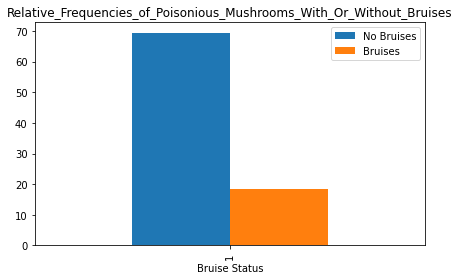

In [39]:
ax = df_p_bruises_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushrooms_With_Or_Without_Bruises')
ax.set_xlabel('Bruise Status')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushrooms_With_Or_Without_Bruises.png')
plt.show()

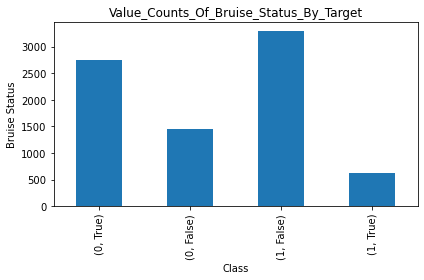

In [40]:
ax= df.groupby('Y')['bruises'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Bruise_Status_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Bruise Status')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Bruise_Status_By_Target.png')
plt.show()

***Odor***

In [41]:
df.groupby('Y')['odor'].value_counts()

Y  odor    
0  none        3408
   almond       400
   anise        400
1  foul        2160
   fishy        576
   spicy        576
   pungent      256
   creosote     192
   none         120
   musty         36
Name: odor, dtype: int64

In [42]:
X['odor'].value_counts()

none        3528
foul        2160
spicy        576
fishy        576
anise        400
almond       400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64

In [43]:
p_odor_percentages = {
                       'foul' : ((2160/2160)*100),
                       'fishy' : ((576/576)*100),
                       'spicy' : ((576/576)*100),
                       'pungent' : ((256/256)*100),
                       'creosote' : ((192/192)*100),
                       'none' : ((120/3528)*100),
                       'musty' : ((36/36)*100),
                       'almond' : ((0/400)*100),
                       'anise' : ((0/400)*100)
                     }
df_p_odor_percentages = pd.DataFrame(p_odor_percentages, index=[1])
df_p_odor_percentages

,foul,fishy,spicy,pungent,creosote,none,musty,almond,anise
1,100.0,100.0,100.0,100.0,100.0,3.401361,100.0,0.0,0.0


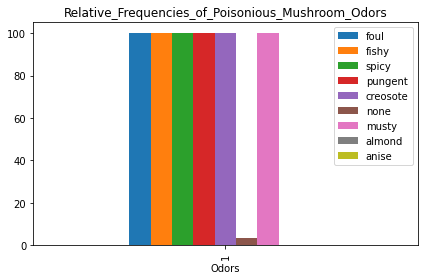

In [44]:
ax = df_p_odor_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_Odors')
ax.set_xlabel('Odors')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_Odors.png')
plt.show()

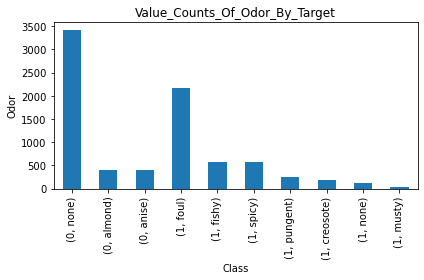

In [45]:
ax= df.groupby('Y')['odor'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Odor_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Odor')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Odor_By_Target.png')
plt.show()

***Gill Attachment***

In [46]:
df.groupby('Y')['gill-attachment'].value_counts()

Y  gill-attachment
0  free               4016
   attached            192
1  free               3898
   attached             18
Name: gill-attachment, dtype: int64

In [47]:
X['gill-attachment'].value_counts()

free        7914
attached     210
Name: gill-attachment, dtype: int64

In [48]:
p_gill_attachment_percentages = {
                               'Free' : ((3898/7914)*100),
                               'Attached' : ((18/210)*100), 
                                }
df_p_gill_attachment_percentages = pd.DataFrame(p_gill_attachment_percentages, index=[1])
df_p_gill_attachment_percentages

,Free,Attached
1,49.254486,8.571429


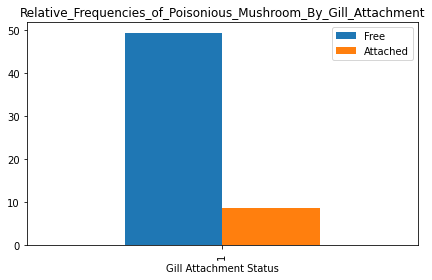

In [49]:
ax = df_p_gill_attachment_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Gill_Attachment')
ax.set_xlabel('Gill Attachment Status')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Gill_Attachment.png')
plt.show()

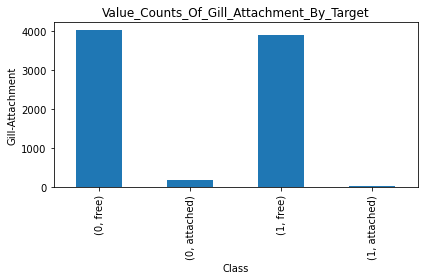

In [50]:
ax= df.groupby('Y')['gill-attachment'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Gill_Attachment_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Gill-Attachment')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Gill_Attachment_By_Target.png')
plt.show()

***Gill Spacing***

In [51]:
df.groupby('Y')['gill-spacing'].value_counts()

Y  gill-spacing
0  close           3008
   crowded         1200
1  close           3804
   crowded          112
Name: gill-spacing, dtype: int64

In [52]:
X['gill-spacing'].value_counts()

close      6812
crowded    1312
Name: gill-spacing, dtype: int64

In [53]:
p_gill_spacing_percentages = {
                               'Close' : ((3804/6812)*100),
                               'Crowded' : ((112/1312)*100), 
                                }
df_p_gill_spacing_percentages  = pd.DataFrame(p_gill_spacing_percentages , index=[1])
df_p_gill_spacing_percentages 

,Close,Crowded
1,55.842631,8.536585


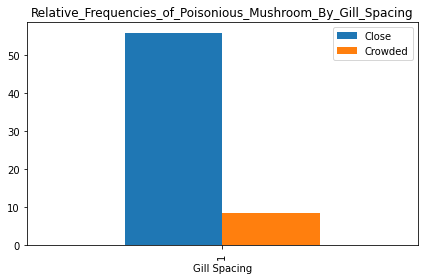

In [54]:
ax = df_p_gill_spacing_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Gill_Spacing')
ax.set_xlabel('Gill Spacing')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Gill_Spacing.png')
plt.show()

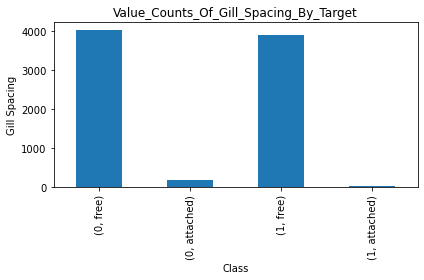

In [55]:
ax= df.groupby('Y')['gill-attachment'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Gill_Spacing_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Gill Spacing')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Gill_Spacing_By_Target.png')
plt.show()

***Gill Size***

In [56]:
df.groupby('Y')['gill-size'].value_counts()

Y  gill-size
0  broad        3920
   narrow        288
1  narrow       2224
   broad        1692
Name: gill-size, dtype: int64

In [57]:
X['gill-size'].value_counts()

broad     5612
narrow    2512
Name: gill-size, dtype: int64

In [58]:
p_gill_size_percentages = {
                               'Broad' : ((1692/5612)*100),
                               'Narrow' : ((2224/2512)*100), 
                                }
df_p_gill_size_percentages  = pd.DataFrame(p_gill_size_percentages , index=[1])
df_p_gill_size_percentages

,Broad,Narrow
1,30.149679,88.535032


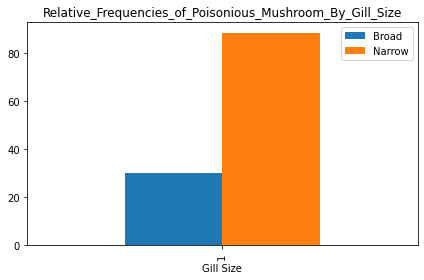

In [59]:
ax = df_p_gill_size_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Gill_Size')
ax.set_xlabel('Gill Size')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Gill_Size.png')
plt.show()

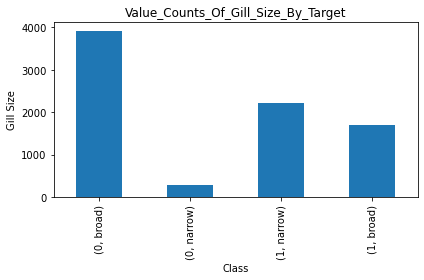

In [60]:
ax= df.groupby('Y')['gill-size'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Gill_Size_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Gill Size')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Gill_Size_By_Target.png')
plt.show()

***Gill Color***

In [61]:
df.groupby('Y')['gill-color'].value_counts()

Y  gill-color
0  white          956
   brown          936
   pink           852
   purple         444
   black          344
   gray           248
   chocolate      204
   red             96
   orange          64
   yellow          64
1  buff          1728
   pink           640
   chocolate      528
   gray           504
   white          246
   brown          112
   black           64
   purple          48
   green           24
   yellow          22
Name: gill-color, dtype: int64

In [62]:
X['gill-color'].value_counts()

buff         1728
pink         1492
white        1202
brown        1048
gray          752
chocolate     732
purple        492
black         408
red            96
yellow         86
orange         64
green          24
Name: gill-color, dtype: int64

In [63]:
p_gill_color_percentages = {   
                                'Buff': ((1728/1728)*100),
                                'Pink': ((640/1492)*100),
                                'White': ((246/1202)*100),
                                'Brown': ((112/1048)*100),
                                'Gray': ((504/752)*100),
                                'Chocolate': ((528/732)*100),
                                'Purple': ((48/492)*100),
                                'Black': ((64/408)*100),
                                'Red': ((0/96)*100),
                                'Yellow': ((22/86)*100),
                                'Orange': ((0/64)*100),
                                'Green': ((24/24)*100),
                            }

df_p_gill_color_percentages = pd.DataFrame(p_gill_color_percentages, index=[1])
df_p_gill_color_percentages

,Buff,Pink,White,Brown,Gray,Chocolate,Purple,Black,Red,Yellow,Orange,Green
1,100.0,42.895442,20.46589,10.687023,67.021277,72.131148,9.756098,15.686275,0.0,25.581395,0.0,100.0


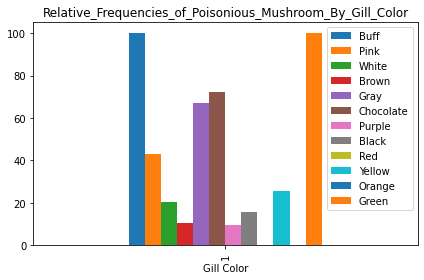

In [64]:
ax = df_p_gill_color_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Gill_Color')
ax.set_xlabel('Gill Color')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Gill_Color.png')
plt.show()

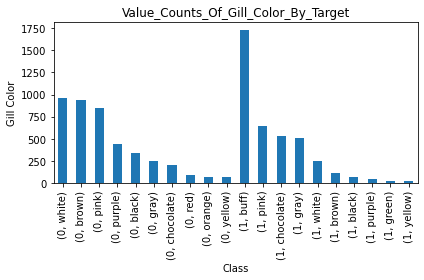

In [65]:
ax= df.groupby('Y')['gill-color'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Gill_Color_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Gill Color')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Gill_Color_By_Target.png')
plt.show()

***Stalk Shape***

In [66]:
df.groupby('Y')['stalk-shape'].value_counts()

Y  stalk-shape
0  tapering       2592
   enlarging      1616
1  tapering       2016
   enlarging      1900
Name: stalk-shape, dtype: int64

In [67]:
X['stalk-shape'].value_counts()

tapering     4608
enlarging    3516
Name: stalk-shape, dtype: int64

In [68]:
p_stalk_shape_percentages = {
                               'Tapering' : ((2016/4608)*100),
                               'Enlarging' : ((1900/3516)*100), 
                            }

df_p_stalk_shape_percentages  = pd.DataFrame(p_stalk_shape_percentages , index=[1])
df_p_stalk_shape_percentages

,Tapering,Enlarging
1,43.75,54.03868


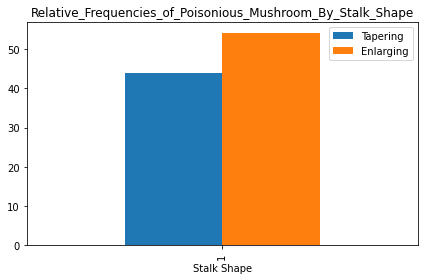

In [69]:
ax = df_p_stalk_shape_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Stalk_Shape')
ax.set_xlabel('Stalk Shape')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Stalk_Shape.png')
plt.show()

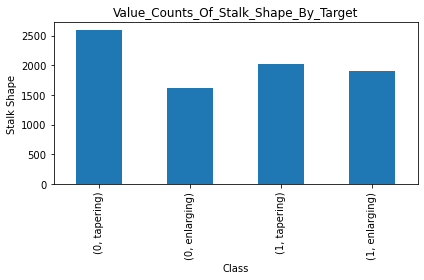

In [70]:
ax= df.groupby('Y')['stalk-shape'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Stalk_Shape_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Stalk Shape')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Stalk_Shape_By_Target.png')
plt.show()

***Stalk Root***

In [71]:
df.groupby('Y')['stalk-root'].value_counts()

Y  stalk-root
0  bulbous       2640
   equal          864
   club           512
   rooted         192
1  bulbous       3616
   equal          256
   club            44
Name: stalk-root, dtype: int64

In [72]:
X['stalk-root'].value_counts()

bulbous    6256
equal      1120
club        556
rooted      192
Name: stalk-root, dtype: int64

In [73]:
p_stalk_root_percentages = {
                               'Bulbous' : ((3616/6256)*100),
                               'Equal' : ((256/1120)*100),
                               'Club' : ((44/556)*100),
                               'Rooted' : ((0/192)*100)
                            }

df_p_stalk_root_percentages  = pd.DataFrame(p_stalk_root_percentages , index=[1])
df_p_stalk_root_percentages

,Bulbous,Equal,Club,Rooted
1,57.800512,22.857143,7.913669,0.0


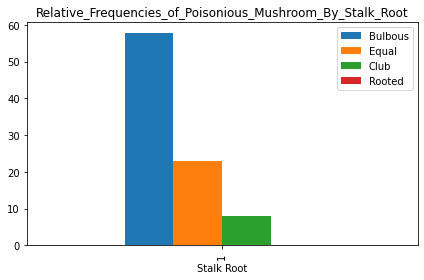

In [74]:
ax = df_p_stalk_root_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Stalk_Root')
ax.set_xlabel('Stalk Root')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Stalk_Root.png')
plt.show()

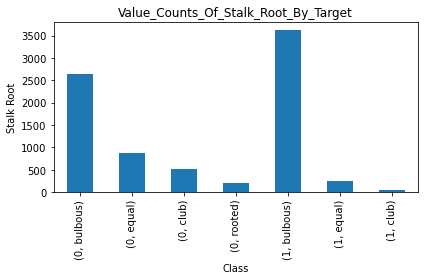

In [75]:
ax= df.groupby('Y')['stalk-root'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Stalk_Root_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Stalk Root')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Stalk_Root_By_Target.png')
plt.show()

***Stalk Surface Above Ring***

In [76]:
df.groupby('Y')['stalk-surface-above-ring'].value_counts()

Y  stalk-surface-above-ring
0  smooth                      3640
   fibrous                      408
   silky                        144
   scaly                         16
1  silky                       2228
   smooth                      1536
   fibrous                      144
   scaly                          8
Name: stalk-surface-above-ring, dtype: int64

In [77]:
X['stalk-surface-above-ring'].value_counts()

smooth     5176
silky      2372
fibrous     552
scaly        24
Name: stalk-surface-above-ring, dtype: int64

In [78]:
p_stalk_surface_above_ring_percentages = {
                                           'Smooth' : ((1536/5176)*100),
                                           'Silky' : ((2228/2372)*100),
                                           'Fibrous' : ((144/552)*100),
                                           'Scaly' : ((8/24)*100),
                                         
                                          }

df_p_stalk_surface_above_ring_percentages  = pd.DataFrame(p_stalk_surface_above_ring_percentages , index=[1])
df_p_stalk_surface_above_ring_percentages

,Smooth,Silky,Fibrous,Scaly
1,29.675425,93.929174,26.086957,33.333333


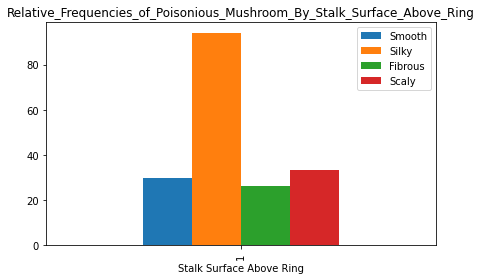

In [79]:
ax = df_p_stalk_surface_above_ring_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Stalk_Surface_Above_Ring')
ax.set_xlabel('Stalk Surface Above Ring')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Stalk_Surface_Above_Ring.png')
plt.show()

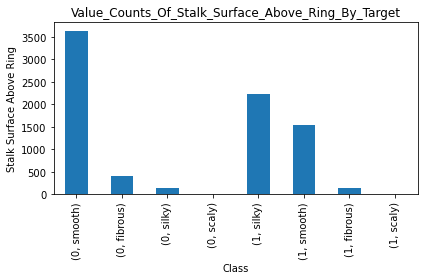

In [80]:
ax= df.groupby('Y')['stalk-surface-above-ring'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Stalk_Surface_Above_Ring_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Stalk Surface Above Ring')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Stalk_Surface_Above_Ring_By_Target.png')
plt.show()

***Stalk Surface Below Ring***

In [81]:
df.groupby('Y')['stalk-surface-below-ring'].value_counts()

Y  stalk-surface-below-ring
0  smooth                      3400
   fibrous                      456
   scaly                        208
   silky                        144
1  silky                       2160
   smooth                      1536
   fibrous                      144
   scaly                         76
Name: stalk-surface-below-ring, dtype: int64

In [82]:
X['stalk-surface-below-ring'].value_counts()

smooth     4936
silky      2304
fibrous     600
scaly       284
Name: stalk-surface-below-ring, dtype: int64

In [83]:
p_stalk_surface_below_ring_percentages = {
                                           'Smooth' : ((1536/4936)*100),
                                           'Silky' : ((2160/2304)*100),
                                           'Fibrous' : ((144/600)*100),
                                           'Scaly' : ((76/284)*100),
                                            }
df_p_stalk_surface_below_ring_percentages  = pd.DataFrame(p_stalk_surface_below_ring_percentages , index=[1])
df_p_stalk_surface_below_ring_percentages

,Smooth,Silky,Fibrous,Scaly
1,31.118314,93.75,24.0,26.760563


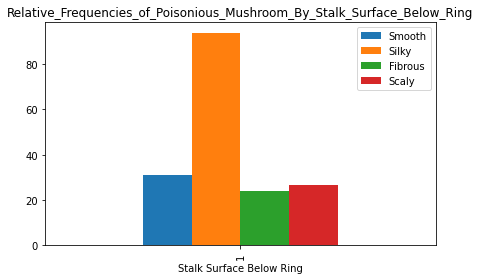

In [84]:
ax = df_p_stalk_surface_below_ring_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Stalk_Surface_Below_Ring')
ax.set_xlabel('Stalk Surface Below Ring')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Stalk_Surface_Below_Ring.png')
plt.show()

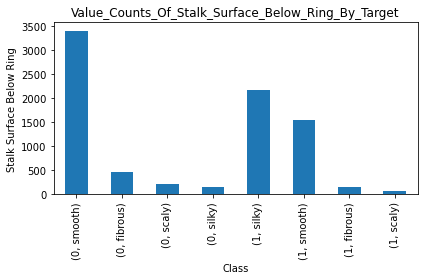

In [85]:
ax= df.groupby('Y')['stalk-surface-below-ring'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Stalk_Surface_Below_Ring_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Stalk Surface Below Ring')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Stalk_Surface_Below_Ring_By_Target.png')
plt.show()

***Stalk Color Above Ring***

In [86]:
df.groupby('Y')['stalk-color-above-ring'].value_counts()

Y  stalk-color-above-ring
0  white                     2752
   gray                       576
   pink                       576
   orange                     192
   red                         96
   brown                       16
1  white                     1712
   pink                      1296
   brown                      432
   buff                       432
   cinnamon                    36
   yellow                       8
Name: stalk-color-above-ring, dtype: int64

In [87]:
X['stalk-color-above-ring'].value_counts()

white       4464
pink        1872
gray         576
brown        448
buff         432
orange       192
red           96
cinnamon      36
yellow         8
Name: stalk-color-above-ring, dtype: int64

In [88]:
p_stalk_color_above_ring_percentages = {   
                                'White': ((1712/4464)*100),                            
                                'Pink': ((1296/1872)*100),
                                'Gray': ((0/576)*100),
                                'Brown': ((432/448)*100),
                                'Buff': ((432/432)*100),
                                'Orange': ((0/192)*100),
                                'Red': ((0/96)*100),
                                'Cinnamon': ((36/36)*100),
                                'Yellow': ((8/8)*100) 
                            }

df_p_stalk_color_above_ring_percentages = pd.DataFrame(p_stalk_color_above_ring_percentages, index=[1])
df_p_stalk_color_above_ring_percentages

,White,Pink,Gray,Brown,Buff,Orange,Red,Cinnamon,Yellow
1,38.351254,69.230769,0.0,96.428571,100.0,0.0,0.0,100.0,100.0


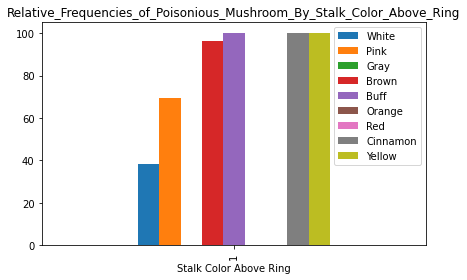

In [89]:
ax = df_p_stalk_color_above_ring_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Stalk_Color_Above_Ring')
ax.set_xlabel('Stalk Color Above Ring')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Stalk_Color_Above_Ring.png')
plt.show()

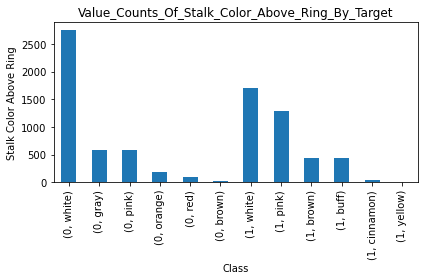

In [90]:
ax= df.groupby('Y')['stalk-color-above-ring'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Stalk_Color_Above_Ring_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Stalk Color Above Ring')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Stalk_Color_Above_Ring_By_Target.png')
plt.show()

***Stalk Color Below Ring***

In [91]:
df.groupby('Y')['stalk-color-below-ring'].value_counts()

Y  stalk-color-below-ring
0  white                     2704
   gray                       576
   pink                       576
   orange                     192
   red                         96
   brown                       64
1  white                     1680
   pink                      1296
   brown                      448
   buff                       432
   cinnamon                    36
   yellow                      24
Name: stalk-color-below-ring, dtype: int64

In [92]:
X['stalk-color-below-ring'].value_counts()

white       4384
pink        1872
gray         576
brown        512
buff         432
orange       192
red           96
cinnamon      36
yellow        24
Name: stalk-color-below-ring, dtype: int64

In [93]:
p_stalk_color_below_ring_percentages = {   
                                'White': ((1680/4384)*100),                            
                                'Pink': ((1296/1872)*100),
                                'Gray': ((0/576)*100),
                                'Brown': ((448/512)*100),
                                'Buff': ((432/432)*100),
                                'Orange': ((0/192)*100),
                                'Red': ((0/96)*100),
                                'Cinnamon': ((36/36)*100),
                                'Yellow': ((24/24)*100) 
                            }

df_p_stalk_color_below_ring_percentages = pd.DataFrame(p_stalk_color_below_ring_percentages, index=[1])
df_p_stalk_color_below_ring_percentages

,White,Pink,Gray,Brown,Buff,Orange,Red,Cinnamon,Yellow
1,38.321168,69.230769,0.0,87.5,100.0,0.0,0.0,100.0,100.0


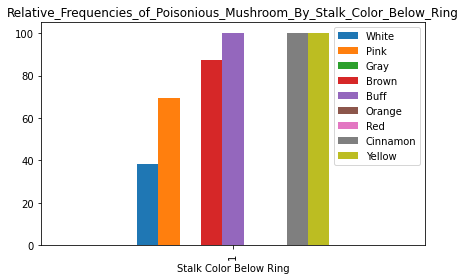

In [94]:
ax = df_p_stalk_color_below_ring_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Stalk_Color_Below_Ring')
ax.set_xlabel('Stalk Color Below Ring')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Stalk_Color_Below_Ring.png')
plt.show()

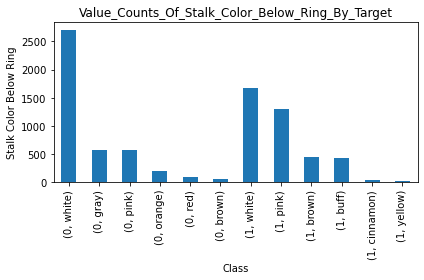

In [95]:
ax= df.groupby('Y')['stalk-color-below-ring'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Stalk_Color_Below_Ring_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Stalk Color Below Ring')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Stalk_Color_Below_Ring_By_Target.png')
plt.show()

***Veil Type***

In [96]:
df.groupby('Y')['veil-type'].value_counts()

Y  veil-type
0  partial      4208
1  partial      3916
Name: veil-type, dtype: int64

In [97]:
X['veil-type'].value_counts()

partial    8124
Name: veil-type, dtype: int64

In [98]:
p_veil_type_percentages = {
                               'Partial' : ((3916/8124)*100),
                                }
df_p_veil_type_percentages  = pd.DataFrame(p_veil_type_percentages , index=[1])
df_p_veil_type_percentages

,Partial
1,48.202856


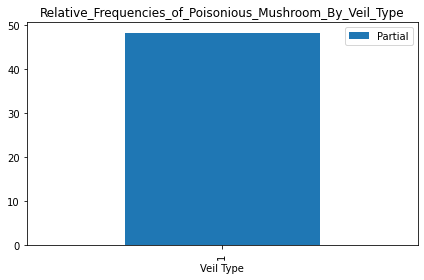

In [99]:
ax = df_p_veil_type_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Veil_Type')
ax.set_xlabel('Veil Type')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Veil_Type.png')
plt.show()

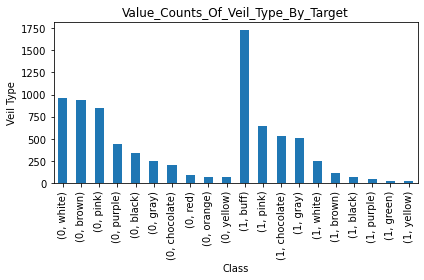

In [100]:
ax= df.groupby('Y')['gill-color'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Veil_Type_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Veil Type')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Veil_Type_By_Target.png')
plt.show()

***Veil Color***

In [101]:
df.groupby('Y')['veil-color'].value_counts()

Y  veil-color
0  white         4016
   brown           96
   orange          96
1  white         3908
   yellow           8
Name: veil-color, dtype: int64

In [102]:
X['veil-color'].value_counts()

white     7924
brown       96
orange      96
yellow       8
Name: veil-color, dtype: int64

In [103]:
p_veil_color_percentages = {   
                                'White': ((3908/7924)*100),                            
                                'Brown': ((0/96)*100),
                                'Orange': ((0/96)*100),
                                'Yellow': ((8/8)*100) 
                            }

df_p_veil_color_percentages = pd.DataFrame(p_veil_color_percentages, index=[1])
df_p_veil_color_percentages

,White,Brown,Orange,Yellow
1,49.318526,0.0,0.0,100.0


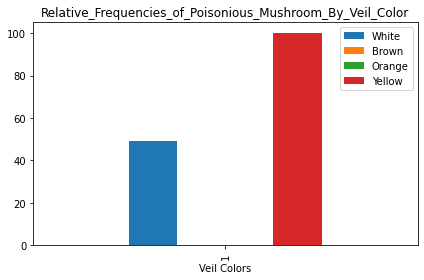

In [104]:
ax = df_p_veil_color_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Veil_Color')
ax.set_xlabel('Veil Colors')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Veil_Color.png')
plt.show()

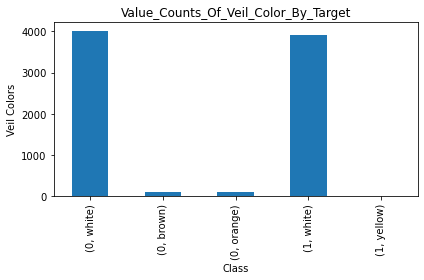

In [105]:
ax= df.groupby('Y')['veil-color'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Veil_Color_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Veil Colors')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Veil_Color_By_Target.png')
plt.show()

***Ring Number***

In [106]:
df.groupby('Y')['ring-number'].value_counts()

Y  ring-number
0  one            3680
   two             528
1  one            3808
   two              72
   none             36
Name: ring-number, dtype: int64

In [107]:
X['ring-number'].value_counts()

one     7488
two      600
none      36
Name: ring-number, dtype: int64

In [108]:
p_ring_number_percentages = {
                               'Zero' : ((36/36)*100),
                               'One' : ((3808/7488)*100),
                               'Two' : ((72/600)*100),
                                }
df_p_ring_number_percentages  = pd.DataFrame(p_ring_number_percentages , index=[1])
df_p_ring_number_percentages

,Zero,One,Two
1,100.0,50.854701,12.0


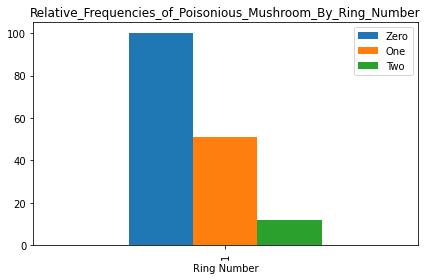

In [109]:
ax = df_p_ring_number_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Ring_Number')
ax.set_xlabel('Ring Number')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Ring_Number.png')
plt.show()

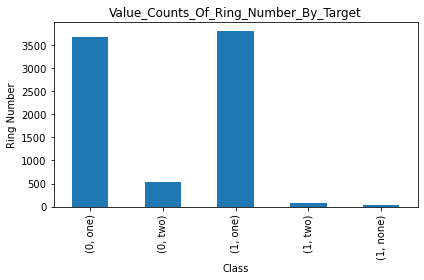

In [110]:
ax= df.groupby('Y')['ring-number'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Ring_Number_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Ring Number')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Ring_Number_By_Target.png')
plt.show()

***Ring Type***

In [111]:
df.groupby('Y')['ring-type'].value_counts()

Y  ring-type 
0  pendant       3152
   evanescent    1008
   flaring         48
1  evanescent    1768
   large         1296
   pendant        816
   none            36
Name: ring-type, dtype: int64

In [112]:
X['ring-type'].value_counts()

pendant       3968
evanescent    2776
large         1296
flaring         48
none            36
Name: ring-type, dtype: int64

In [113]:
p_ring_type_percentages = {
                               'Pendant' : ((816/3968)*100),
                               'Evanescent' : ((1768/2776)*100),
                               'Large' : ((1296/1296)*100),
                               'Flaring' : ((0/48)*100),
                               'None' : ((36/36)*100),
                            }
df_p_ring_type_percentages  = pd.DataFrame(p_ring_type_percentages , index=[1])
df_p_ring_type_percentages

,Pendant,Evanescent,Large,Flaring,None
1,20.564516,63.688761,100.0,0.0,100.0


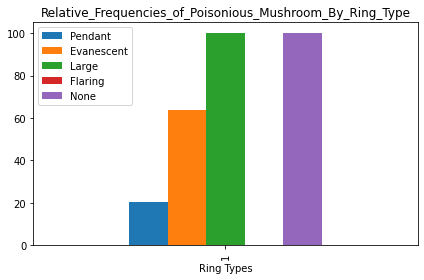

In [114]:
ax = df_p_ring_type_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Ring_Type')
ax.set_xlabel('Ring Types')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Ring_Type.png')
plt.show()

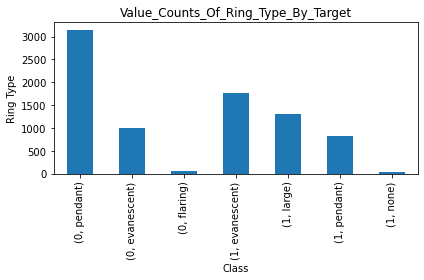

In [115]:
ax= df.groupby('Y')['ring-type'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Ring_Type_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Ring Type')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Ring_Type_By_Target.png')
plt.show()

***Spore Print Color***

In [116]:
df.groupby('Y')['spore-print-color'].value_counts()

Y  spore-print-color
0  brown                1744
   black                1648
   white                 576
   buff                   48
   chocolate              48
   orange                 48
   purple                 48
   yellow                 48
1  white                1812
   chocolate            1584
   black                 224
   brown                 224
   green                  72
Name: spore-print-color, dtype: int64

In [117]:
X['spore-print-color'].value_counts()

white        2388
brown        1968
black        1872
chocolate    1632
green          72
buff           48
purple         48
orange         48
yellow         48
Name: spore-print-color, dtype: int64

In [118]:
p_spore_print_color_percentages = {
    
                                    'White': ((1812/2388)*100),
                                    'Brown': ((224/1968)*100),
                                    'Black': ((224/1872)*100),
                                    'Chocolate': ((1584/1632)*100),
                                    'Green': ((72/72)*100),
                                    'Purple': ((0/48)*100),
                                    'Buff': ((0/48)*100),
                                    'Orange': ((0/48)*100),
                                    'Yellow': ((0/48)*100)                           

                                    }

df_p_spore_print_color_percentages = pd.DataFrame(p_spore_print_color_percentages, index=[1])
df_p_spore_print_color_percentages

,White,Brown,Black,Chocolate,Green,Purple,Buff,Orange,Yellow
1,75.879397,11.382114,11.965812,97.058824,100.0,0.0,0.0,0.0,0.0


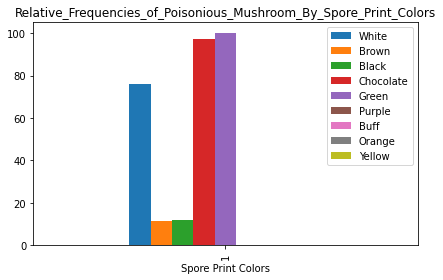

In [119]:
ax = df_p_spore_print_color_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Spore_Print_Colors')
ax.set_xlabel('Spore Print Colors')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Spore_Print_Colors.png')
plt.show()

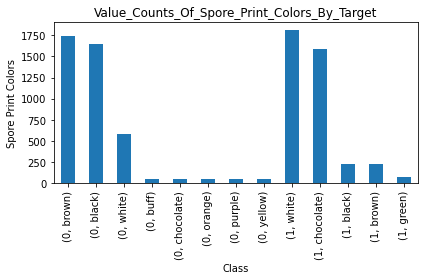

In [120]:
ax= df.groupby('Y')['spore-print-color'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Spore_Print_Colors_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Spore Print Colors')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Spore_Print_Colors_By_Target.png')
plt.show()

***Population***

In [121]:
df.groupby('Y')['population'].value_counts()

Y  population
0  several       1192
   solitary      1064
   scattered      880
   numerous       400
   abundant       384
   clustered      288
1  several       2848
   solitary       648
   scattered      368
   clustered       52
Name: population, dtype: int64

In [122]:
X['population'].value_counts()

several      4040
solitary     1712
scattered    1248
numerous      400
abundant      384
clustered     340
Name: population, dtype: int64

In [123]:
p_population_percentages = {
                               
                               'Several' : ((2848/4040)*100),
                               'Solitary' : ((648/1712)*100),
                               'Scattered' : ((368/1248)*100),
                               'Numerous' : ((0/400)*100),
                               'Abundant' : ((0/384)*100),
                               'Clustered' : ((52/340)*100)
                             
                            }

df_p_population_percentages  = pd.DataFrame(p_population_percentages , index=[1])
df_p_population_percentages

,Several,Solitary,Scattered,Numerous,Abundant,Clustered
1,70.49505,37.850467,29.487179,0.0,0.0,15.294118


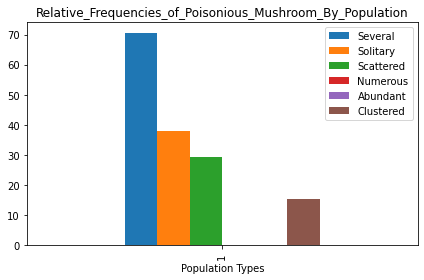

In [124]:
ax = df_p_population_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Population')
ax.set_xlabel('Population Types')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Population.png')
plt.show()

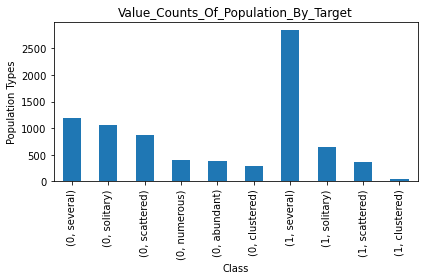

In [125]:
ax= df.groupby('Y')['population'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Population_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Population Types')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Population_By_Target.png')
plt.show()

***Habitat***

In [126]:
df.groupby('Y')['habitat'].value_counts()

Y  habitat
0  woods      1880
   grasses    1408
   meadows     256
   leaves      240
   waste       192
   paths       136
   urban        96
1  woods      1268
   paths      1008
   grasses     740
   leaves      592
   urban       272
   meadows      36
Name: habitat, dtype: int64

In [127]:
X['habitat'].value_counts()

woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: habitat, dtype: int64

In [128]:
p_habitat_percentages = {
 
                                'Woods' : ((1268/3148)*100),
                                'Grasses' : ((740/2148)*100),
                                'Paths' : ((1008/1144)*100),
                                'Leaves' : ((592/832)*100),
                                'Urban' : ((272/368)*100),
                                'Meadows' : ((36/292)*100),
                                'Waste' : ((0/192)*100)

    
                            }

df_p_habitat_percentages  = pd.DataFrame(p_habitat_percentages , index=[1])
df_p_habitat_percentages

,Woods,Grasses,Paths,Leaves,Urban,Meadows,Waste
1,40.279543,34.450652,88.111888,71.153846,73.913043,12.328767,0.0


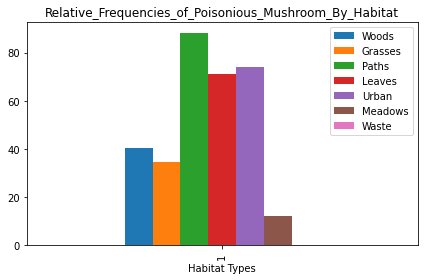

In [129]:
ax = df_p_habitat_percentages.plot.bar()
ax.set_title('Relative_Frequencies_of_Poisonious_Mushroom_By_Habitat')
ax.set_xlabel('Habitat Types')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Relative_Frequencies_of_Poisonious_Mushroom_By_Habitat.png')
plt.show()

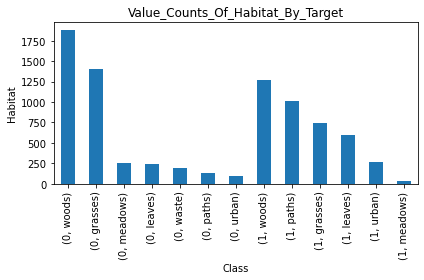

In [130]:
ax= df.groupby('Y')['habitat'].value_counts().plot.bar()
ax.set_title('Value_Counts_Of_Habitat_By_Target')
ax.set_xlabel('Class')
ax.set_ylabel('Habitat')

plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Value_Counts_Of_Habitat_By_Target.png')
plt.show()

***FEATURE ENGINEERING***

In [131]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-root-missing
0,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,0
1,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses,0
2,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows,0
3,convex,scaly,white,True,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,0
4,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses,0


In [178]:
X.columns

Index(['cap-shape_conical', 'cap-shape_convex', 'cap-shape_flat',
       'cap-shape_knobbed', 'cap-shape_sunken', 'cap-surface_grooves',
       'cap-surface_scaly', 'cap-surface_smooth', 'cap-color_buff',
       'cap-color_cinnamon', 'cap-color_gray', 'cap-color_green',
       'cap-color_pink', 'cap-color_purple', 'cap-color_red',
       'cap-color_white', 'cap-color_yellow', 'bruises_True', 'odor_anise',
       'odor_creosote', 'odor_fishy', 'odor_foul', 'odor_musty', 'odor_none',
       'odor_pungent', 'odor_spicy', 'gill-attachment_free',
       'gill-spacing_crowded', 'gill-size_narrow', 'gill-color_brown',
       'gill-color_buff', 'gill-color_chocolate', 'gill-color_gray',
       'gill-color_green', 'gill-color_orange', 'gill-color_pink',
       'gill-color_purple', 'gill-color_red', 'gill-color_white',
       'gill-color_yellow', 'stalk-shape_tapering', 'stalk-root_club',
       'stalk-root_equal', 'stalk-root_rooted',
       'stalk-surface-above-ring_scaly', 'stalk-surface-abov

In [133]:
df.shape

(8124, 24)

In [134]:
df.dtypes

Y                           object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
stalk-root-missing           int64
dtype: object

In [135]:
df['Y'].value_counts()

0    4208
1    3916
Name: Y, dtype: int64

In [136]:
df = pd.get_dummies(df, columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat','stalk-root-missing'], drop_first = True)

***Splitting Data Into X,Y (Features, Target) & Performing A Train-Test Split***

In [137]:
X = df.drop('Y', axis=1)
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

In [138]:
X_train.columns

Index(['cap-shape_conical', 'cap-shape_convex', 'cap-shape_flat',
       'cap-shape_knobbed', 'cap-shape_sunken', 'cap-surface_grooves',
       'cap-surface_scaly', 'cap-surface_smooth', 'cap-color_buff',
       'cap-color_cinnamon', 'cap-color_gray', 'cap-color_green',
       'cap-color_pink', 'cap-color_purple', 'cap-color_red',
       'cap-color_white', 'cap-color_yellow', 'bruises_True', 'odor_anise',
       'odor_creosote', 'odor_fishy', 'odor_foul', 'odor_musty', 'odor_none',
       'odor_pungent', 'odor_spicy', 'gill-attachment_free',
       'gill-spacing_crowded', 'gill-size_narrow', 'gill-color_brown',
       'gill-color_buff', 'gill-color_chocolate', 'gill-color_gray',
       'gill-color_green', 'gill-color_orange', 'gill-color_pink',
       'gill-color_purple', 'gill-color_red', 'gill-color_white',
       'gill-color_yellow', 'stalk-shape_tapering', 'stalk-root_club',
       'stalk-root_equal', 'stalk-root_rooted',
       'stalk-surface-above-ring_scaly', 'stalk-surface-abov

In [139]:
X_train.shape

(6093, 95)

***Decision Tree***

In [140]:
dt = DecisionTreeClassifier()
dtree = dt.fit(X_train, y_train)

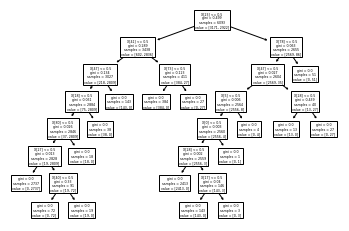

In [141]:
plot_tree(dt);

In [142]:
dt.score(X, y)

1.0

**Bagging**

In [143]:
# Instatiate a BaggingRegessor
bag = BaggingClassifier(n_estimators=100, verbose=1)
bag.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


BaggingClassifier(n_estimators=100, verbose=1)

In [144]:
bag.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


1.0

In [145]:
# Instatiate a BaggingRegessor
bag = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100)

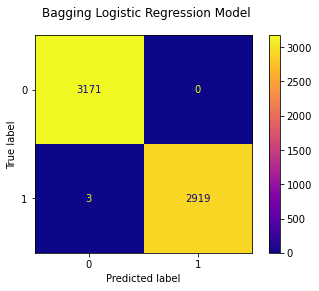

In [146]:
fig, ax = plt.subplots()

fig.suptitle("Bagging Logistic Regression Model")

plot_confusion_matrix(bag, X_train, y_train, ax=ax, cmap="plasma");

In [147]:
scores = cross_val_score(estimator=bag, X=X_train, y=y_train, cv=5)
scores

array([0.99917966, 0.99917966, 1.        , 0.99753695, 1.        ])

In [148]:
np.median(scores)

0.9991796554552912

In [149]:
# Score on test
bag.score(X_test, y_test)

1.0

**Random Forest Classifier**

In [150]:
# Instantiate a RandomForestClassifier
rfr = RandomForestClassifier(max_features='sqrt', max_samples=0.5)
# Fit it
rfr.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', max_samples=0.5)

In [151]:
# Cross-validation
scores = cross_val_score(estimator=rfr, X=X_train, y=y_train, cv=5)
scores

array([1., 1., 1., 1., 1.])

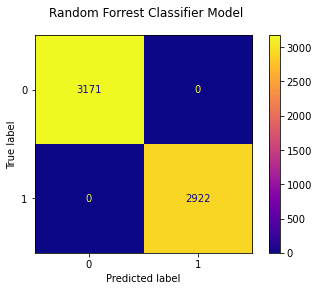

In [152]:
fig, ax = plt.subplots()

fig.suptitle("Random Forrest Classifier Model")

plot_confusion_matrix(rfr, X_train, y_train, ax=ax, cmap="plasma");

In [153]:
np.median(scores)

1.0

In [154]:
# Score on test
score = rfr.score(X_test, y_test)
score

1.0

In [155]:
X_test.columns

Index(['cap-shape_conical', 'cap-shape_convex', 'cap-shape_flat',
       'cap-shape_knobbed', 'cap-shape_sunken', 'cap-surface_grooves',
       'cap-surface_scaly', 'cap-surface_smooth', 'cap-color_buff',
       'cap-color_cinnamon', 'cap-color_gray', 'cap-color_green',
       'cap-color_pink', 'cap-color_purple', 'cap-color_red',
       'cap-color_white', 'cap-color_yellow', 'bruises_True', 'odor_anise',
       'odor_creosote', 'odor_fishy', 'odor_foul', 'odor_musty', 'odor_none',
       'odor_pungent', 'odor_spicy', 'gill-attachment_free',
       'gill-spacing_crowded', 'gill-size_narrow', 'gill-color_brown',
       'gill-color_buff', 'gill-color_chocolate', 'gill-color_gray',
       'gill-color_green', 'gill-color_orange', 'gill-color_pink',
       'gill-color_purple', 'gill-color_red', 'gill-color_white',
       'gill-color_yellow', 'stalk-shape_tapering', 'stalk-root_club',
       'stalk-root_equal', 'stalk-root_rooted',
       'stalk-surface-above-ring_scaly', 'stalk-surface-abov

In [156]:
feat_import = {name: score 
                   for name, score 
                       in zip(X_test.columns, rfr.feature_importances_)
}
feat_import

{'cap-shape_conical': 0.00011699762336924902,
 'cap-shape_convex': 0.0016577064110086949,
 'cap-shape_flat': 0.0010890536892033858,
 'cap-shape_knobbed': 0.0002217750379468443,
 'cap-shape_sunken': 0.0006521890787091459,
 'cap-surface_grooves': 0.00035477179868090015,
 'cap-surface_scaly': 0.002692189733722797,
 'cap-surface_smooth': 0.008243333811273396,
 'cap-color_buff': 0.002678715132369618,
 'cap-color_cinnamon': 0.00018784399995359655,
 'cap-color_gray': 0.0018823315010040608,
 'cap-color_green': 0.00026445220251834734,
 'cap-color_pink': 0.0027078498763428343,
 'cap-color_purple': 0.00022124327985061884,
 'cap-color_red': 0.0016165499916489347,
 'cap-color_white': 0.004764626164612989,
 'cap-color_yellow': 0.0066904883512502854,
 'bruises_True': 0.03916824514148161,
 'odor_anise': 0.005772312921641574,
 'odor_creosote': 0.0172572138287751,
 'odor_fishy': 0.005513803316248837,
 'odor_foul': 0.07892964179329914,
 'odor_musty': 0.0002991950174734338,
 'odor_none': 0.140012979601779

In [174]:
{k: v for k, v in sorted(feat_import.items(), key=lambda item: item[1])}

{'spore-print-color_buff': 0.0,
 'spore-print-color_orange': 0.0,
 'spore-print-color_yellow': 0.0,
 'stalk-color-below-ring_red': 3.902768475670228e-06,
 'gill-color_orange': 3.0561505658049714e-05,
 'stalk-color-below-ring_orange': 8.289590342284112e-05,
 'stalk-color-above-ring_orange': 0.00010228926687606818,
 'cap-shape_conical': 0.00011699762336924902,
 'gill-color_red': 0.0001368193572227812,
 'stalk-surface-above-ring_scaly': 0.00013844031352902851,
 'stalk-color-above-ring_yellow': 0.000172464966406876,
 'cap-color_cinnamon': 0.00018784399995359655,
 'cap-color_purple': 0.00022124327985061884,
 'cap-shape_knobbed': 0.0002217750379468443,
 'cap-color_green': 0.00026445220251834734,
 'odor_musty': 0.0002991950174734338,
 'veil-color_yellow': 0.00033014287602622927,
 'cap-surface_grooves': 0.00035477179868090015,
 'gill-color_yellow': 0.00036433008997820366,
 'veil-color_orange': 0.0003694047777409365,
 'gill-color_purple': 0.0004913845273821372,
 'stalk-color-above-ring_pink': 0

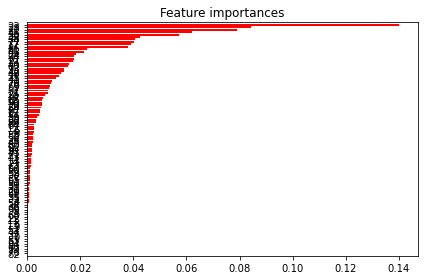

In [175]:
importances = rfr.feature_importances_
std = np.std([rfr.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Feature_Importances.png')
plt.show()

***Logistic Regression***

In [157]:
logreg_model = LogisticRegression(random_state=2021)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=2021)

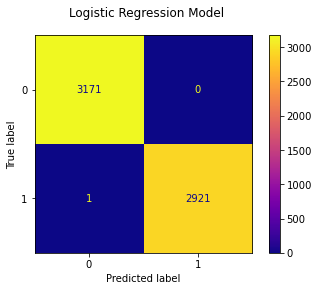

In [158]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Model")

plot_confusion_matrix(logreg_model, X_train, y_train, ax=ax, cmap="plasma");

In [159]:
logreg_model_more_iterations = LogisticRegression(random_state=2021, max_iter=1000)
logreg_model_more_iterations.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=2021)

In [160]:
# Cross-validation
iter_scores = cross_val_score(estimator=logreg_model_more_iterations, X=X_train, y=y_train, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [161]:
#use the fitted model to predict on the test data
logreg_model_more_iterations_pred = logreg_model_more_iterations.predict(X_test)
# checking Accuracy on the test data
print('Test Accuracy score: ', accuracy_score(y_test, logreg_model_more_iterations_pred))
# checking Recall on the test data
#print('Test Recall score: ', recall_score(y_test, logreg_model_more_iterations_pred))

Test Accuracy score:  1.0


In [162]:
logreg_model_more_regularization = LogisticRegression(random_state=2021, C=0.01)
logreg_model_more_regularization.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=2021)

In [163]:
# Cross-validation
reg_scores = cross_val_score(estimator=logreg_model_more_regularization, X=X_train, y=y_train, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [164]:
logreg_model_higher_tolerance = LogisticRegression(random_state=2021, tol=50)
logreg_model_higher_tolerance.fit(X_train, y_train)

LogisticRegression(random_state=2021, tol=50)

In [165]:
# Cross-validation
tol_scores = cross_val_score(estimator=logreg_model_higher_tolerance, X=X_train, y=y_train, cv=5)
scores

array([1., 1., 1., 1., 1.])

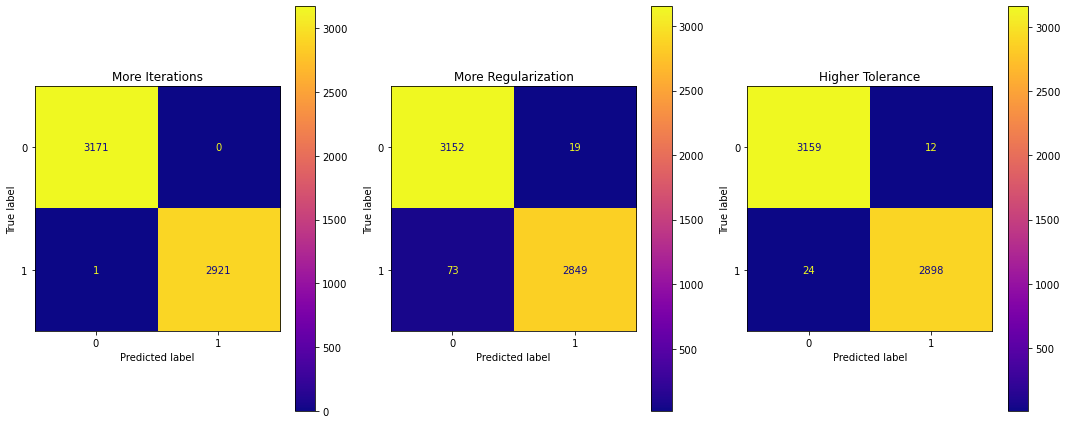

In [176]:
fix, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

axes[0].set_title("More Iterations")
axes[1].set_title("More Regularization")
axes[2].set_title("Higher Tolerance")

plot_confusion_matrix(logreg_model_more_iterations, X_train, y_train,
                      ax=axes[0], cmap="plasma")
plot_confusion_matrix(logreg_model_more_regularization, X_train, y_train,
                      ax=axes[1], cmap="plasma")
plot_confusion_matrix(logreg_model_higher_tolerance, X_train, y_train,
                      ax=axes[2], cmap="plasma");
plt.tight_layout()
plt.savefig('Mushroom_Class/Data-Visualizations/Model_Confusion_Matrices.png')